In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [8]:
def load_dataset():

    with h5py.File('datasets/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('datasets/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [9]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [19]:
# np.shape(train_set_x_orig)
np.shape(test_set_x_orig)

(50, 64, 64, 3)

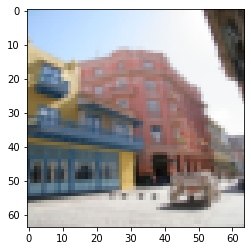

In [33]:
plt.imshow(train_set_x_orig[23])

In [30]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]

#attributes of input(here image dimension)
nx = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(nx))
print ("Each image is of size: (" + str(nx) + ", " + str(nx) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [34]:
#make matrix X
#(a, b, c, d) -> (b * c * d, a)

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [35]:
#standardize dataset
#final dataset
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [36]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [39]:
print(str(sigmoid(9.2)))


0.9998989708060922


In [48]:
def initialize_with_zeros(dim):
    w, b = np.zeros(shape = (dim, 1)), 0
    return w, b

In [49]:
w, b = initialize_with_zeros(3)
print(w)
print(b)

[[0.]
 [0.]
 [0.]]
0


In [77]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    z = np.dot(w.T, X) + b
    a = sigmoid(z)
    
    #cost is vector
    cost = (-1/m) * np.sum(Y * np.log(a) + (1-Y) * np.log(1 - a))
        
    dw = (1 / m) * np.dot(X, (a - Y).T)
    db = (1 / m) * np.sum(a - Y)
    
    #dw is vector and db is scalar
    cost = np.squeeze(cost)
    grade = {"dw":dw , "db":db}
    
    return grade, cost

In [78]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [79]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    m = X.shape[1]
    
    c = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw, db = grads["dw"], grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
            
        if i % 100 == 0:
            c.append(cost)
            
        if print_cost and i % 100 == 0:
            print("cost after iteration %i: %f" % (i, cost))
    
    params = {"w" : w, "b" : b}
    grads = {"dw" : dw, "db" : db}
    
    return params, grads, cost

In [80]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.0001, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.99000071]
 [1.98000205]]
b = 1.995000672827622
dw = [[0.99992673]
 [1.99978701]]
db = 0.4999301398744472


Hell
